<a href="https://colab.research.google.com/github/patrick-barber/Disney-data-analysis-project/blob/master/Barber_Skelly_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Making One's Disney Trip as Painless as Possible or How to Avoid Screaming Babies

## Weather:  Comparing Average Daily Temperature vs. Average Daily Wait Time

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/Disney Data 2018/'

In [0]:
#read in the data from the rides
r1 = pd.read_csv(open(path + 'ride_splashmt.csv'))
r2 = pd.read_csv(open(path + 'ride_pirates.csv'))
r3 = pd.read_csv(open(path + 'ride_soarin.csv'))
r4 = pd.read_csv(open(path + 'ride_spaceshipearth.csv'))
r5 = pd.read_csv(open(path + 'ride_rockincoaster.csv'))
r6 = pd.read_csv(open(path + 'ride_toystory.csv'))
r7 = pd.read_csv(open(path + 'ride_expeditioneverest.csv'))
r8 = pd.read_csv(open(path + 'ride_kilimanjarosafaris.csv'))
r9 = pd.read_csv(open(path + 'ride_naviriver.csv'))
r10 = pd.read_csv(open(path + 'ride_flightofpassage.csv'))
r11 = pd.read_csv(open(path + 'ride_dinosaur.csv'))
r12 = pd.read_csv(open(path + 'ride_sevendwarfs.csv'))
r13 = pd.read_csv(open(path + 'ride_slinkydog.csv'))
r14 = pd.read_csv(open(path + 'ride_aliensaucers.csv'))
# Concatenate the data files with a new index
ride = pd.concat([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14], ignore_index=True)

# Rename the columns to more intuitive names
ride = ride.rename(index=str, columns={'SPOSTMIN': 'Time', 'date': 'Date'})

# Select only the Date and Time columns
ride = ride[['Date','Time']]

# Select only the time values that are reasonable
ride = ride[ (ride['Time'] >= 0) & (ride['Time'] < 400) ]


# Print number of rows and columns, and the first 5 rows
print(ride.shape)
ride.head()

(2400786, 2)


,Date,Time
0,01/01/2012,30.0
1,01/01/2012,30.0
3,01/01/2012,30.0
5,01/01/2012,35.0
6,01/01/2012,25.0


In [0]:
# Group by Date and compute mean wait time for each date
ride = ride.groupby(['Date'], as_index=False).mean()

# split the Date and add the Month as a separate field
datetime = ride['Date'].str.split("/", expand = True)
ride['Month'] = datetime[0].astype(int).fillna(0)

#save a copy of ride
ride2 = ride.copy(deep=True)
ride2['Date'] = pd.to_datetime(ride2['Date'])
ride2 = ride2.set_index('Date')

# Use the date as the row key
ride = ride.set_index('Date')

# Print number of rows and columns, and the first 5 rows
print(ride.shape)
ride.head()

(2493, 2)


,Time,Month
Date,,
01/01/2012,32.321429,1
01/01/2013,49.287037,1
01/01/2014,43.437164,1
01/01/2015,59.580645,1
01/01/2016,49.690681,1


In [0]:
# Read the meta data
meta = pd.read_csv(open(path + 'metadata_day_info.csv'))

# Select only the date and WDWMINTEMP_mean: Walt Disney World Temp mean
metaTemp = meta[['DATE','WDWMEANTEMP']]

# Rename columns to more intuitive labels
metaTemp = metaTemp.rename(columns={'DATE': 'Date', 'WDWMEANTEMP':'Temp'})


#create a copy of metaTemp
metaTemp2 = metaTemp.copy(deep=True)
metaTemp2['Date'] = pd.to_datetime(metaTemp2['Date'])
metaTemp2 = metaTemp2.set_index('Date')

# Use the date as the row key
metaTemp = metaTemp.set_index('Date')


# Verify that it worked
print(metaTemp.shape)
metaTemp.tail()

(2493, 1)


,Temp
Date,
10/27/2018,68.97
10/28/2018,65.21
10/29/2018,68.30
10/30/2018,71.33
10/31/2018,72.23


##Average Temperatures

(array([  9.,  16.,  57., 108., 174., 230., 387., 446., 726., 334.]),
 array([39.75 , 44.524, 49.298, 54.072, 58.846, 63.62 , 68.394, 73.168,
        77.942, 82.716, 87.49 ]),
 <a list of 10 Patch objects>)

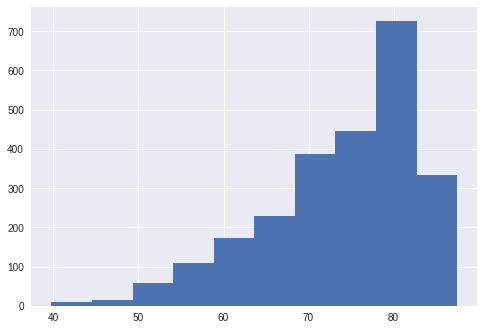

In [0]:
metaTemp = metaTemp [metaTemp['Temp']>=0]
plt.hist(metaTemp['Temp'])


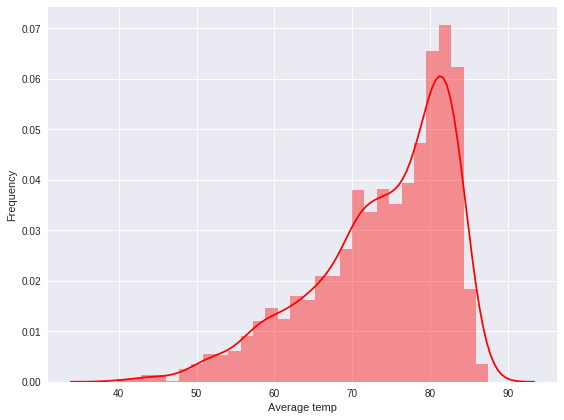

In [0]:
# Select the column
data = metaTemp['Temp']

# Set the number of bins
b = 30

# Setup the axes 
f, axes = plt.subplots(figsize=(8, 6))

# Plot a histogram and kernel density estimate
sns.distplot(data, color="r", ax=axes, bins=b)

# Setup the plot
plt.xlabel('Average temp')
plt.ylabel('Frequency')

f.tight_layout()

#show the plot
plt.show()

In [0]:
# Combine using the concatentation function where axis=1 means each data frame will be a column
final = pd.concat([metaTemp,ride], axis=1)

#create a copy of final
finalNa = pd.concat([metaTemp2,ride2], axis=1)


# Remove any values that are NaN
final = final.dropna()

# Print number of rows and columns, and the first 5 rows
print(final.shape)
final.head()

(2487, 3)


,Temp,Time,Month
01/01/2012,65.93,32.321429,1
01/01/2013,64.19,49.287037,1
01/01/2014,61.69,43.437164,1
01/01/2015,66.41,59.580645,1
01/01/2016,75.26,49.690681,1


##Average Wait Time vs. Daily Temp Graph

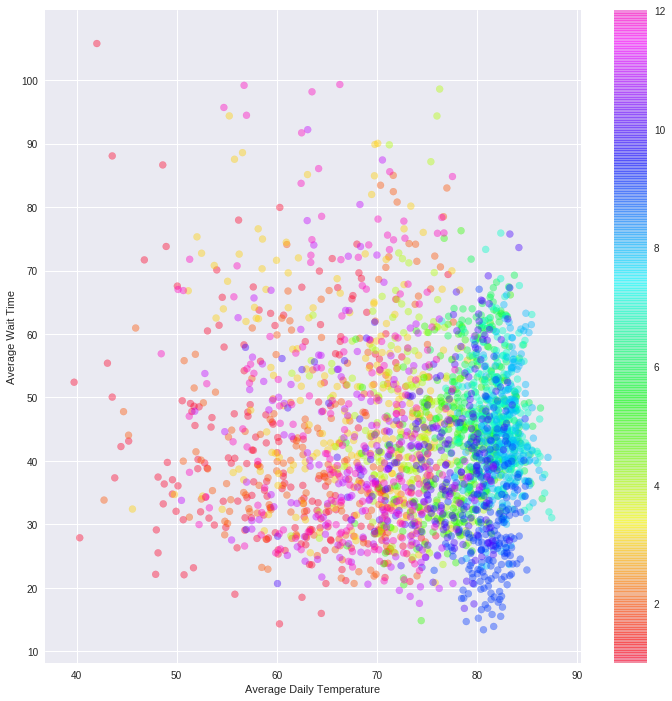

In [0]:
# Create an array of colors 
colors = final['Month'].values

# axis ticks
xstep = 10
ystep = 10

# Setup the axes 
f, axes = plt.subplots(figsize=(12, 12))
axes.set_xticks(np.arange(0, 100, xstep))
axes.set_yticks(np.arange(0, 110, ystep))

plt.xlabel('Average Daily Temperature')
plt.ylabel('Average Wait Time')
plt.scatter(final['Temp'], final['Time'], c=colors, alpha=0.4, cmap='gist_rainbow')
plt.colorbar()
plt.show()

##Average Wait Time vs. Temp by Month of Year

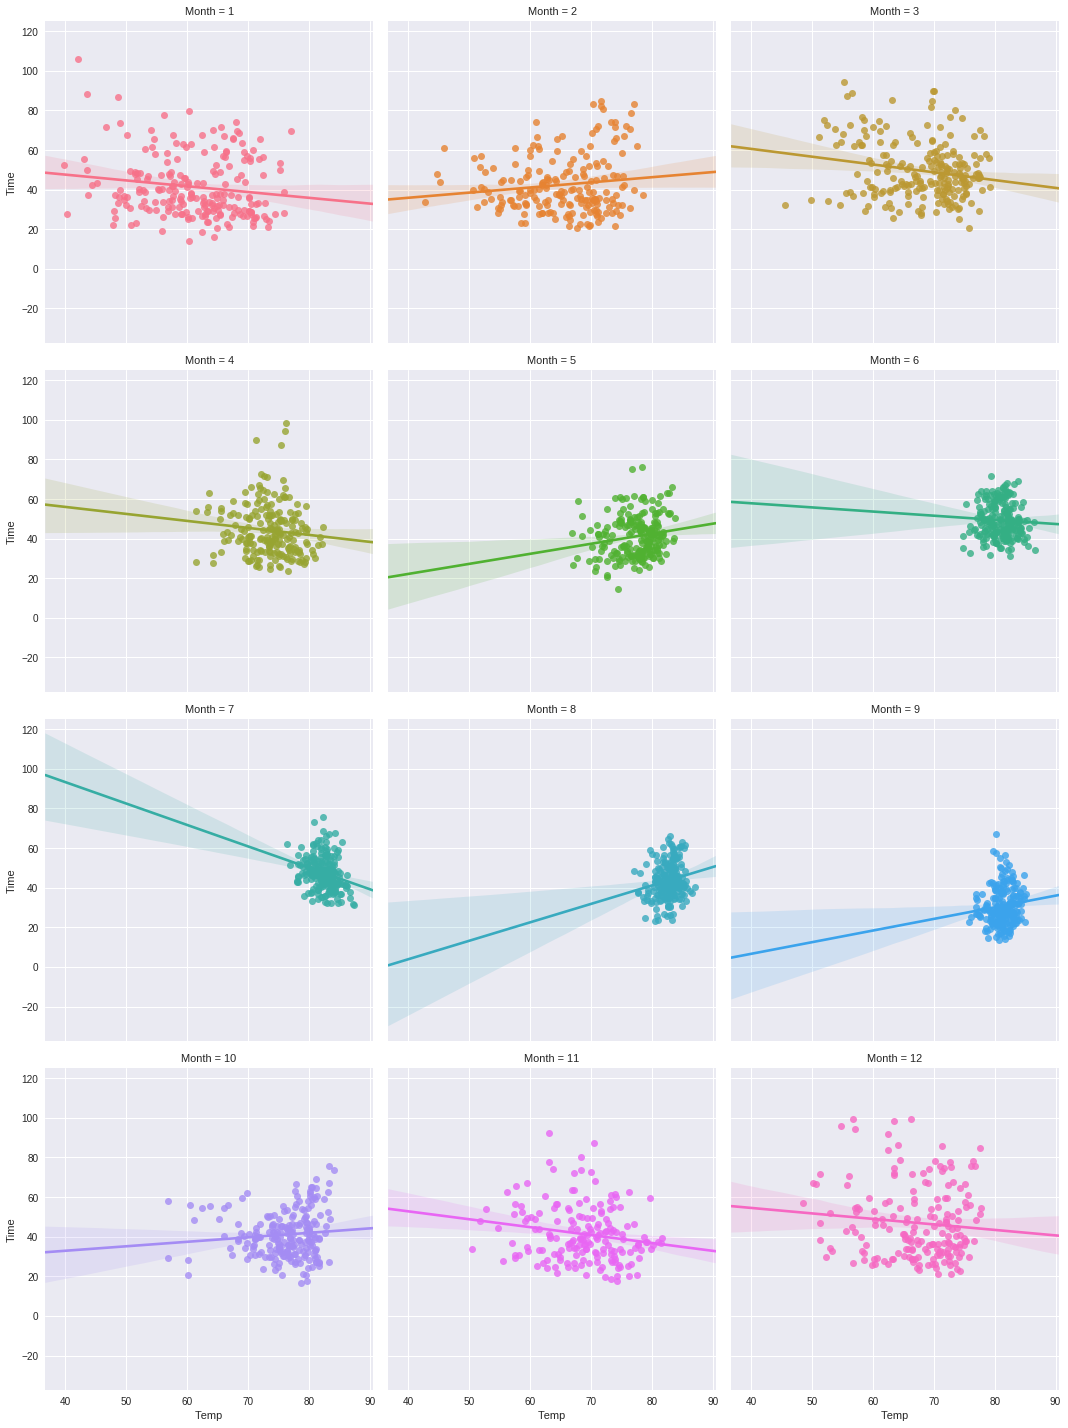

In [0]:
sns.lmplot(x='Temp', y='Time', col='Month', hue='Month', data=final, col_wrap=3)
plt.show()

##Splash mountain data only


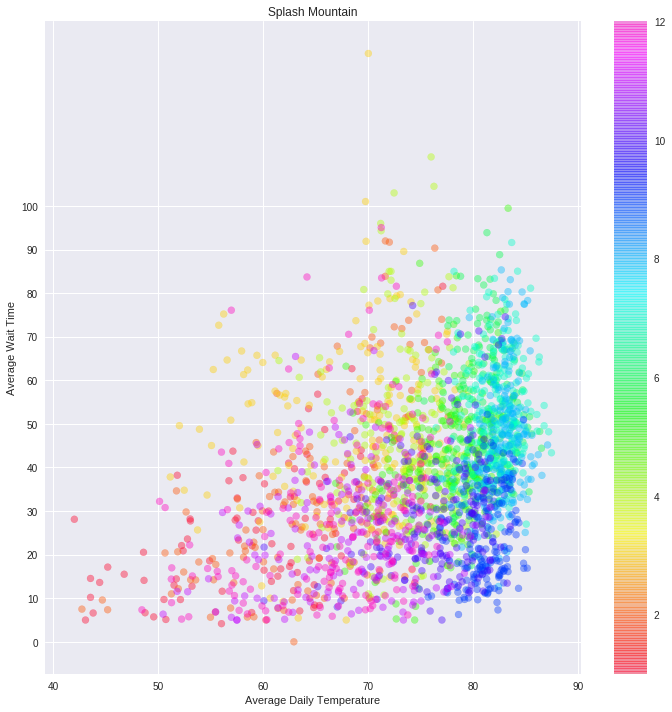

In [0]:
splashMt = pd.read_csv(open(path + 'ride_splashmt.csv'))
splashMt = splashMt.rename(index=str, columns={'SPOSTMIN': 'Time', 'date': 'Date'})

# Select only the Date and Time columns
splashMt = splashMt[['Date','Time']]

# Select only the time values that are reasonable
splashMt = splashMt[ (splashMt['Time'] >= 0) & (splashMt['Time'] < 400) ]

# Group by Date and compute mean wait time for each date
splashMt = splashMt.groupby(['Date'], as_index=False).mean()

# split the Date and add the Month as a separate field
SMdatetime = splashMt['Date'].str.split("/", expand = True)
splashMt['Month'] = SMdatetime[0].astype(int).fillna(0)

#sort by date
splashMt.sort_values(by=['Date'])  #need to sort by date properly, to-fix

# Use the date as the row key
splashMt = splashMt.set_index('Date')

# Combine using the concatentation function where axis=1 means each data frame will be a column
finalNa2 = pd.concat([splashMt,metaTemp], axis=1)

# Remove any values that are NaN
splashMTData = finalNa2.dropna()

# Create an array of colors 
colors = splashMTData['Month'].values

# Setup the axes 
f, axes = plt.subplots(figsize=(12, 12))
axes.set_xticks(np.arange(0, 100, xstep))
axes.set_yticks(np.arange(0, 110, ystep))

plt.xlabel('Average Daily Temperature')
plt.ylabel('Average Wait Time')
plt.title('Splash Mountain')
plt.scatter(splashMTData['Temp'], splashMTData['Time'], c=colors, alpha=0.4, cmap='gist_rainbow')
plt.colorbar()
plt.show()

#these right here are good, linear relationship between temperature and wait times.

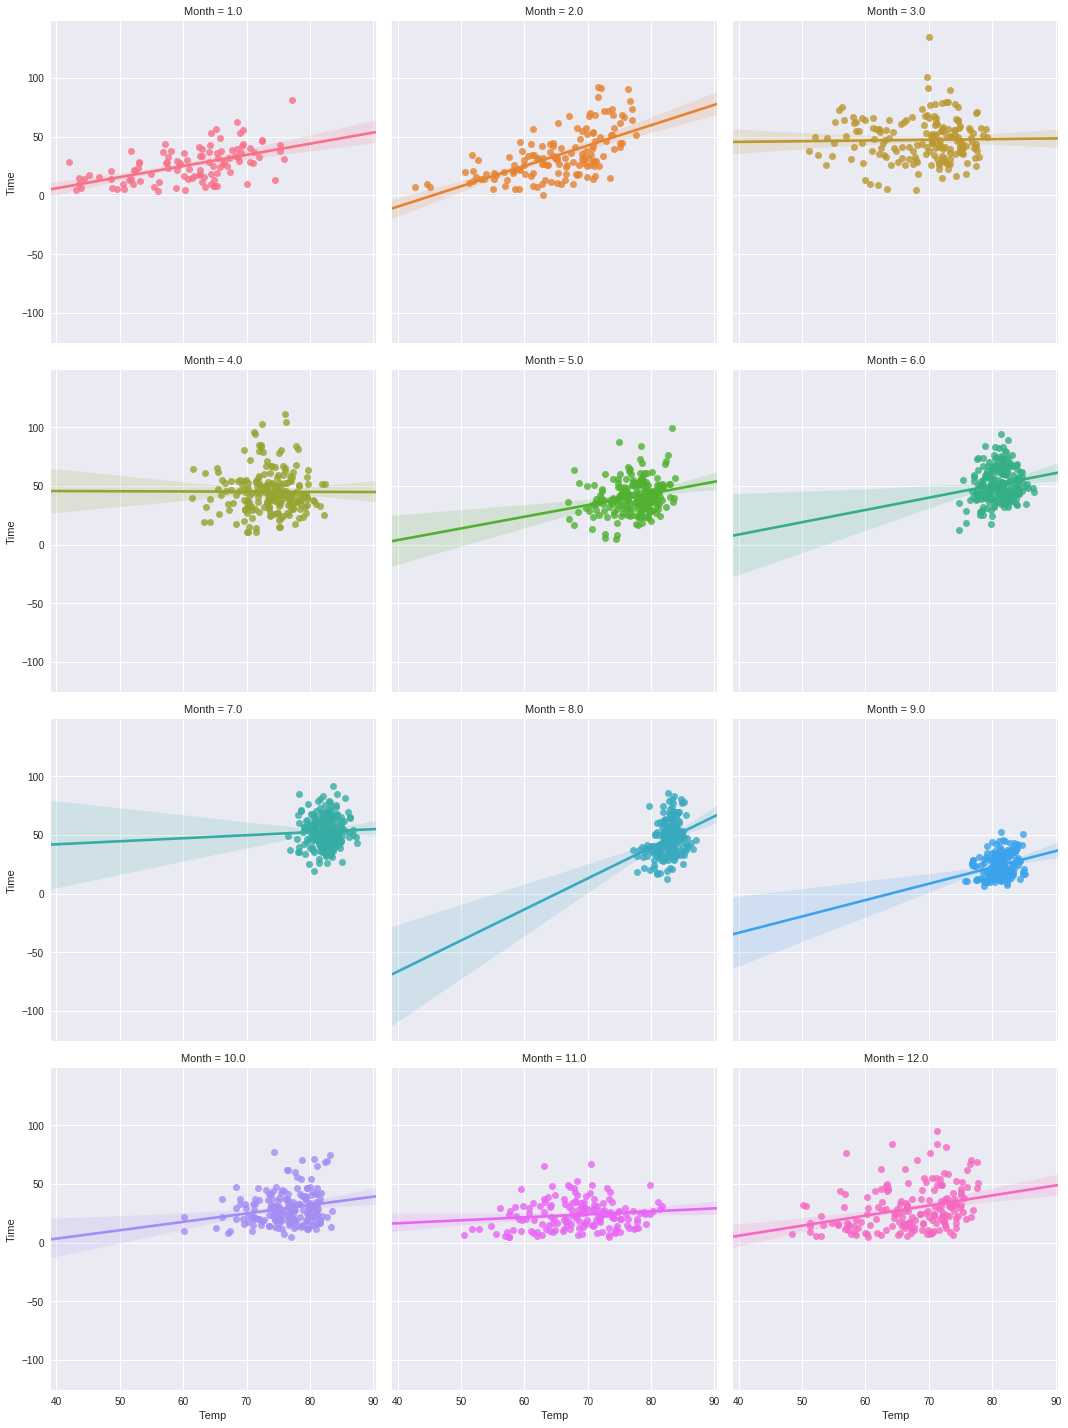

In [0]:
sns.lmplot(x='Temp', y='Time', col='Month', hue='Month', data=splashMTData, col_wrap=3)
plt.show()

##Violin plot??

this isnt it chief



yikes

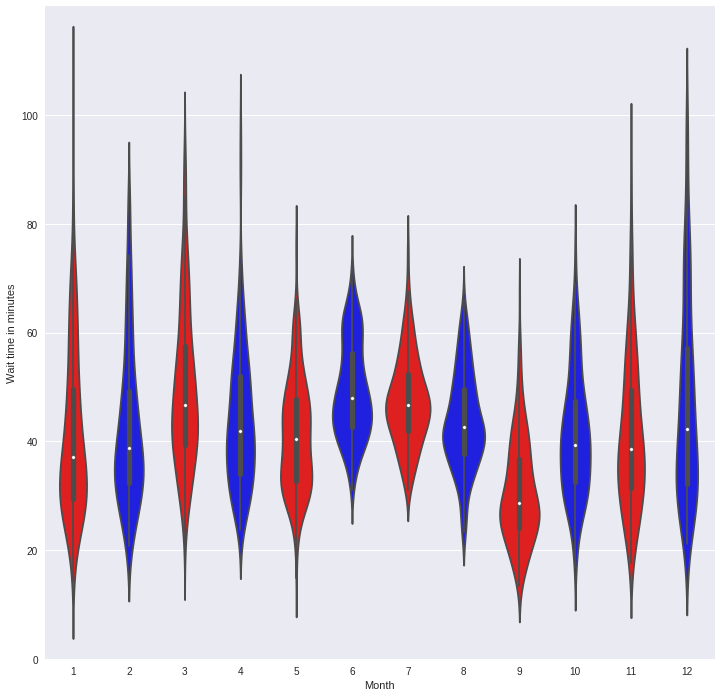

In [0]:
# Setup the axes
end = 120
step = 20
f, axes = plt.subplots(figsize=(12, 12))
axes.set_yticks(np.arange(0, end, step))

# Plot actual and posted violin plots
sns.violinplot(x=final['Month'], y=final['Time'], data=final, palette=['red','blue'])

# Setup the plot
plt.ylabel('Wait time in minutes')
plt.xlabel('Month')

plt.ylim(0,end)
plt.show()

##BOX PLOT...

this dont work


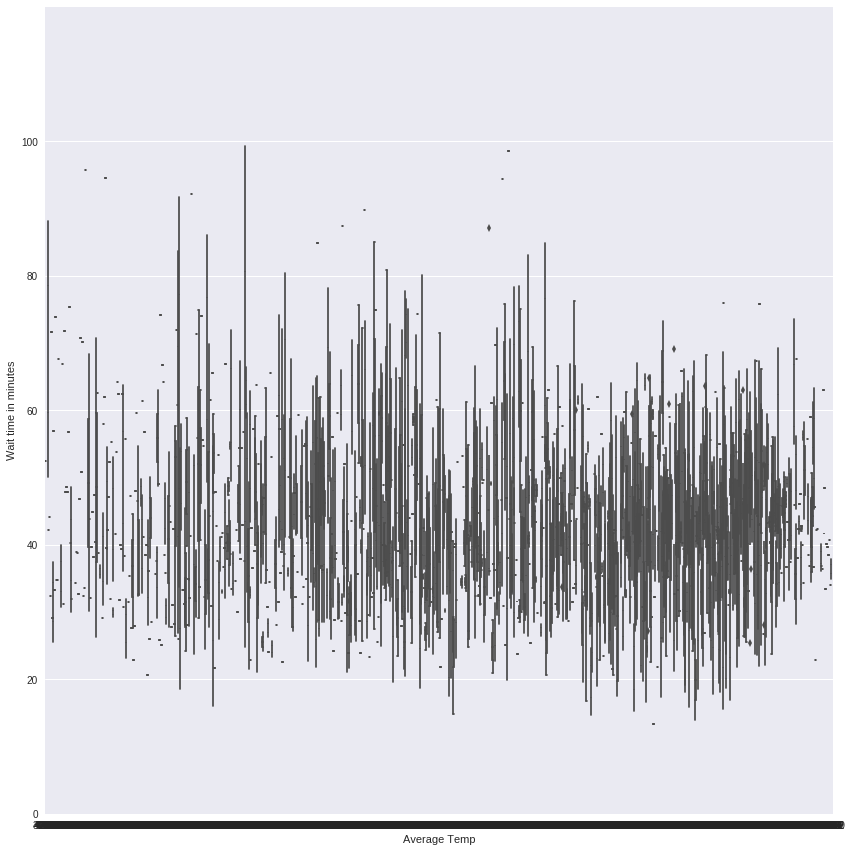

In [0]:
# Setup the axes 
f, axes = plt.subplots(figsize=(12, 12))
axes.set_yticks(np.arange(0, end, step))

# Plot actual and posted violin plots
sns.boxplot(x=final['Temp'], y=final['Time'], data=final, palette=['red','blue'])

# Setup the plot
plt.ylabel('Wait time in minutes')
plt.ylim(0,end)
plt.xlabel('Average Temp')
f.tight_layout()
plt.show()

## Schools: Schools in Session Thoughout the Year

In [0]:
# Select only the date and school inSession data for NY,NJ and Florida
metaInSession = meta [['DATE','inSession_NY_NJ','inSession_Florida','inSession_Enrollment']]

#rename column
metaInSession = metaInSession.rename(columns={'DATE': 'Date'})

metaInSession['Date'] = pd.to_datetime(metaInSession['Date'])
                                    
#set index to Date                                    
metaInSession = metaInSession.set_index('Date')


withSchoolFinalNa = pd.concat([finalNa,metaInSession], axis=1)

#print(metaInSession.shape)
#print(metaInSession.head())

#print(withSchoolFinalNa.shape)
#print(withSchoolFinalNa.head())

#Remove any values that are NaN
withSchoolFinal = withSchoolFinalNa.dropna()

print(withSchoolFinal.shape)
print(withSchoolFinal.tail())

#finalNa



(2487, 6)
             Temp       Time  Month inSession_NY_NJ inSession_Florida  \
Date                                                                    
2018-10-27  68.97  59.359655     10            100%               81%   
2018-10-28  65.21  49.101611     10            100%              100%   
2018-10-29  68.30  46.613208     10            100%              100%   
2018-10-30  71.33  39.257015     10              3%               98%   
2018-10-31  72.23  32.194337     10            100%               98%   

           inSession_Enrollment  
Date                             
2018-10-27                  89%  
2018-10-28                  87%  
2018-10-29                  87%  
2018-10-30                  80%  
2018-10-31                  98%  


##Flight Costs: Flight Prices from Select Populated Areas to Orlando, Florida vs. Least Torrid Days to Wait / Months


In [0]:
path2 = '/content/drive/My Drive/Flight Price Data/'

In [0]:
#read in the data from the price lists
f1 = pd.read_csv(open(path2 + 'NYC(JFK)TOORLANDO.csv'))
f2 = pd.read_csv(open(path2 + 'NYC(LGA)TOORLANDO.csv'))
f3 = pd.read_csv(open(path2 + 'NYC(EWK)TOORLANDO.csv'))

def averagePrices(df):
    
  #Average duplicated months for same years
  df = df.groupby('year').mean().reset_index()
  
  #strip year from dates
  df['year'] = df['year'].str[:3]
   
  #average duplicated months again (this time for different years)
  df = df.groupby('year').mean().reset_index()
  
  #Rename the columns to more intuitive names
  df = df.rename(columns={'year': 'Month', 'price': 'Price'})
  return df ;

#averagePrices on f1,f2,f3
f1 = averagePrices(f1)
f2 = averagePrices(f2)
f3 = averagePrices(f3)

#output heads of price lists
print(f1.head())
print(f2.head())
print(f3.head())




  Month       Price
0   Apr  341.675000
1   Aug  266.493333
2   Dec  298.825000
3   Feb  251.950000
4   Jan  222.503333
  Month       Price
0   Apr  304.133333
1   Aug  326.650000
2   Dec  680.850000
3   Feb  144.500000
4   Jan  217.000000
  Month    Price
0   Apr  362.050
1   Aug  199.395
2   Dec  224.200
3   Feb  374.945
4   Jul  229.910


In [0]:
#concatenate flight files
flights = pd.concat([f1,f2,f3])

#reset indices
flights = flights.reset_index(drop=True)

#average duplicated months again
flights = flights.groupby('Month').min().reset_index()

#output head of flights
print(flights)

   Month       Price
0    Apr  304.133333
1    Aug  199.395000
2    Dec  224.200000
3    Feb  144.500000
4    Jan  217.000000
5    Jul  229.910000
6    Jun  171.300000
7    Mar  203.750000
8    May  199.400000
9    Nov  227.400000
10   Oct  125.050000
11   Sep  161.725000


In [0]:
#manually re organize the data to be grouped by month
#flights = [flights[4],flights[3],flights[7],flights[0],flights[8],flights[6],flights[5],flights[1],flights[11],flights[10],flights[9],flights[2]]
flights = flights.reindex([4,3,7,0,8,6,5,1,11,10,9,2]).reset_index(drop=True)

#flights = flights.rename(index={4:0,3:1,7:2,0:3,8:4,6:5,5:6,1:7,11:8,10:9,9:10,2:11})
#flights = flights.sort_index()
print(flights)

   Month       Price
0    Jan  217.000000
1    Feb  144.500000
2    Mar  203.750000
3    Apr  304.133333
4    May  199.400000
5    Jun  171.300000
6    Jul  229.910000
7    Aug  199.395000
8    Sep  161.725000
9    Oct  125.050000
10   Nov  227.400000
11   Dec  224.200000


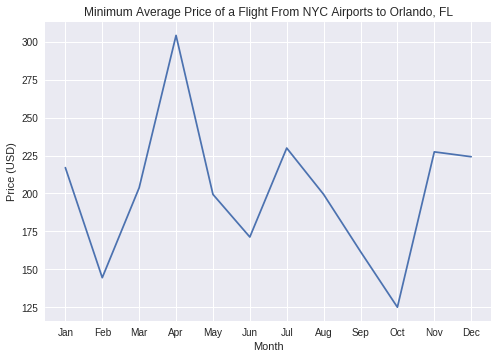

In [0]:
#title
plt.title('Minimum Average Price of a Flight From NYC Airports to Orlando, FL')

# Plot Month vs. Price on a line chart
plt.xticks(np.arange(0,12),flights['Month'])

plt.plot(flights["Price"])

# Setup the plot
plt.xlabel('Month')
plt.ylabel('Price (USD)')

#f.tight_layout()

#show the plot
plt.show()


In [0]:
def getMonthInt(stringIn):
  
    for x in range(0,12):
      if(stringIn == flights.at[x,'Month']): month = x + 1;
      
    return month
  
print(getMonthInt('Jan'))
print(getMonthInt('Dec'))

1
12


In [0]:
#add flight price data to final

#finalFlights = final

#finalFlights = finalFlights.reset_index()





#datetime3 = ride['Date'].str.split("/", expand = True)
#datetime4 = meta[0].str.split("", expand = True)

#rideTemp = ride.rename(index=str, columns={'Date': 'SDate'})
#ride3 = pd.concat([ride2,rideTemp['SDate']], ignore_index=True)
#ride3.shape

#finalFlights

#df['new_date'] = [d.date() for d in df['my_timestamp']]
#df['date'] = df['full_date'].dt.date

#datetimeTemp2 = finalFlights['Date']

#datetimeTemp2['DateD'] = pd.to_datetime(finalFlights['Date'], '%m')

#datetimeTemp2 = finalFlights.Date.dt.month

#datetimeTemp2 = finalFlights['Date'].values.astype('datetime64[M]')

#datetimeTemp2 = pd.DataFrame({'Date': [finalFlights.Date.dt.month]}, columns= ['Date'])

#datetimeTemp3 = datetimeTemp2[0].str.split("-", expand = True)
    
#datetimeTemp4['DateD'] = datetimeTemp3[1].astype(int).fillna(0)
    
#finalFlights.at[x,'Price'] = flights.at[datetimeTemp2.at[x,'DateD'] - 1,'Price']


#df = pd.DataFrame(data, index=index, columns=columns)

#datetimeTemp2 = finalFlights

#for x in range(0, 2387):
  
    #datetimeTemp3 = pd.DataFrame({'Date': finalFlights.at[x,'Date']}, columns= ['Date'], index=[0])
    
    #A = datetimeTemp3.Date.dt.month
  
    #datetimeTemp2.at[x,'Date'] = A[0,0]

#datetimeTemp2  
  

  
  
  
  
  
  
  
  #datetime3 = ride2['Date'].str.split(" ", expand = True)
#datetime4 = datetime3[0].str.split("-", expand = True)
#ride2['DateY'] = datetime4[0].astype(int).fillna(0)
#ride2['DateM'] = datetime4[1].astype(int).fillna(0)
#ride2['DateD'] = datetime4[2].astype(int).fillna(0)
#ride['DateY'] = datetime[0].astype(int).fillna(0)

#datetime = ride['Date'].str.split(" ", expand = True)
#ride['Date'] = datetime[0].astype(int).fillna(0)
#datetime3 = ride['SDate'].str.split("/", expand = True)
#datetime2 = ride['SDate'].str.split("/", expand = True)
#ride['SDate'] = datetime2[0].astype(int).fillna(0)

# This is formatted as code





In [0]:
#final


In [0]:


#add flight price data to final

finalFlights = finalNa.dropna().copy(deep=True)

finalFlights = finalFlights.reset_index()


print(getMonthInt('Jan'))
  
    
#adds month column with month expressed as an int   
finalFlights['Month'] = finalFlights.Date.dt.month.to_frame()


for x in range(0, 2487):
  
    #sets price for each row based on month from above code for getting month int
    finalFlights.at[x,'Price'] = flights.at[finalFlights.at[x,'Month'] - 1,'Price']
    
       
finalFlights.head()


1


,Date,Temp,Time,Month,Price
0,2012-01-01,65.93,32.321429,1,217.0
1,2012-01-02,57.13,47.058824,1,217.0
2,2012-01-03,43.08,55.402299,1,217.0
3,2012-01-04,45.20,43.131868,1,217.0
4,2012-01-05,51.83,45.585938,1,217.0


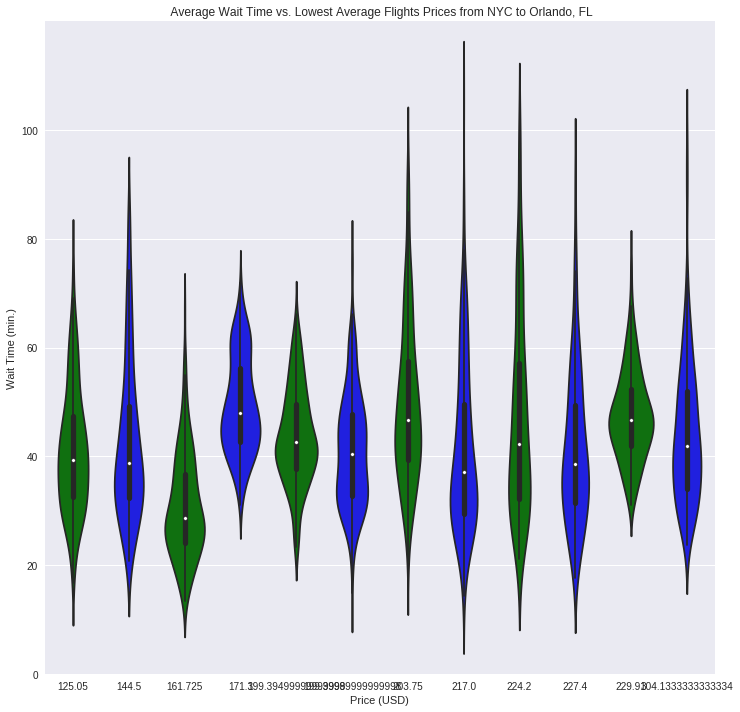

In [0]:
# Setup the axes
end = 120
step = 20
f, axes = plt.subplots(figsize=(12, 12))
axes.set_yticks(np.arange(0, end, step))

plt.title(' Average Wait Time vs. Lowest Average Flights Prices from NYC to Orlando, FL')

# Plot actual and posted violin plots
sns.violinplot(x=finalFlights['Price'], y=finalFlights['Time'], data=finalFlights, palette=['green','blue'])

# Setup the plot
plt.ylabel('Wait Time (min.)')
plt.xlabel('Price (USD)')

plt.ylim(0,end)
plt.show()

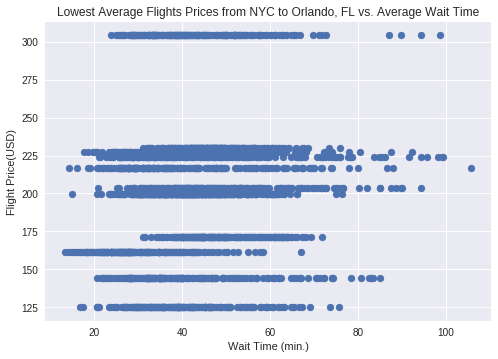

In [0]:
finalFlightsY = finalFlights.groupby(['Month'], as_index=False).mean()

plt.scatter(finalFlights['Time'],finalFlights["Price"])

plt.title('Lowest Average Flights Prices from NYC to Orlando, FL vs. Average Wait Time')
plt.xlabel('Wait Time (min.)')
plt.ylabel('Flight Price(USD)')

f.tight_layout()

#show the plot
plt.show()

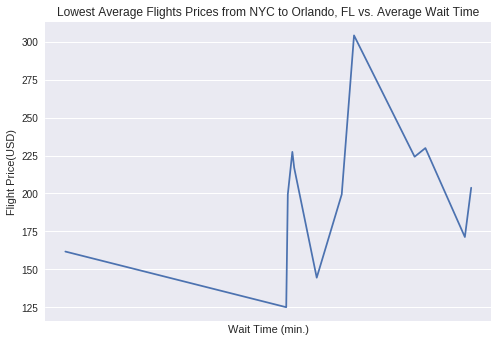

In [0]:

finalFlightsY = finalFlights.groupby(['Month'], as_index=False).mean()

finalFlightsYS = finalFlightsY.sort_values(by='Time', ascending=True)

plt.xticks(np.arange(0,12),finalFlightsYS['Time'])

plt.plot(finalFlightsYS['Time'],finalFlightsYS["Price"])

plt.title('Lowest Average Flights Prices from NYC to Orlando, FL vs. Average Wait Time')
plt.xlabel('Wait Time (min.)')
plt.ylabel('Flight Price(USD)')

f.tight_layout()

#show the plot
plt.show()

#finalFlightsYS.head

##Tying Everything Together:  So When Is The Best Time?

In [0]:
meanTemp = finalFlights.Temp.mean()

for x in range(0, 2487):
  
    #sets normalized value of temperature
    finalFlights.at[x,'NTemp'] = finalFlights.at[x,'Temp'] / meanTemp

    
meanTime = finalFlights.Time.mean()
    
for x in range(0, 2487):
  
    #sets normalized value of temperature
    finalFlights.at[x,'NTime'] = finalFlights.at[x,'Time'] / meanTime
    
    
meanPrice = finalFlights.Price.mean()
    
for x in range(0, 2487):
  
    #sets normalized value of temperature
    finalFlights.at[x,'NPrice'] = finalFlights.at[x,'Price'] / meanPrice
    

#adds day column with month expressed as an int   
finalFlights['Day'] = finalFlights.Date.dt.day.to_frame()  #this needs to include them month too


#for x in range(0, 2487):
  
    #sets price for each row based on month from above code for getting month int
    #finalFlights.at[x,'Price'] = flights.at[finalFlights.at[x,'Month'] - 1,'Price']
        
    
    
finalFlights.tail()


#graph of difference between normalized flight prices and temperatures
#the goal is low temperatures and high flight prices to avoid people bringing multiple children 
#assign flight price data to each month based on (first three char!)month listed.  

,Date,Temp,Time,Month,Price,NTemp,NTime,NPrice,Day
2482,2018-10-27,68.97,59.359655,10,125.05,0.933435,1.370676,0.624734,27
2483,2018-10-28,65.21,49.101611,10,125.05,0.882547,1.133807,0.624734,28
2484,2018-10-29,68.30,46.613208,10,125.05,0.924367,1.076347,0.624734,29
2485,2018-10-30,71.33,39.257015,10,125.05,0.965375,0.906485,0.624734,30
2486,2018-10-31,72.23,32.194337,10,125.05,0.977555,0.743400,0.624734,31


   Month  Day       Temp       Time  Price     NTemp     NTime    NPrice
0      1    1  64.600000  47.003308  217.0  0.874291  1.085355  1.084104
1      1    2  64.782857  61.360829  217.0  0.876766  1.416885  1.084104
2      1    3  58.820000  55.463410  217.0  0.796065  1.280707  1.084104
3      1    4  57.628571  61.023432  217.0  0.779941  1.409094  1.084104
4      1    5  58.876667  56.889628  217.0  0.796832  1.313640  1.084104
        NTemp    NPrice     NTime
361  0.906976  1.120074  1.535004
362  0.933818  1.120074  1.702547
363  0.928946  1.120074  1.659758
364  0.834073  1.120074  1.723946
365  0.888119  1.120074  1.850430


(366, 3)

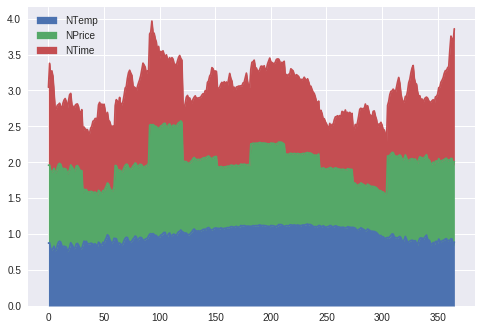

In [0]:
# Dataset
plotable = finalFlights.groupby(['Month','Day'], as_index=False).mean()

plotable2 = plotable[['NTemp','NPrice','NTime']]

 
# plot
plotable2.plot.area()

#checking to make sure the rows are still in order
print(plotable.head())

#checking tail of plotable2
print(plotable2.tail())

#checking number of days recorded
plotable2.shape

In [0]:
plotable4 = finalFlights.groupby(['Month','Day'], as_index=False).mean()

plotable4 = plotable4[['NTemp','NPrice','NTime','Month','Day']]

sumable = plotable4[['NTemp','NPrice','NTime']]


sumable = sumable.sum(axis=1)

plotable4['Sum'] = sumable

plotable5 = plotable4.sort_values(by='Sum', ascending=True)


for x in range(0, 366):
  
    plotable4.at[x,'SumR'] = plotable4['Sum'].max() - plotable4.at[x,'Sum']
    
    
plotable4.head()

,NTemp,NPrice,NTime,Month,Day,Sum,SumR
0,0.874291,1.084104,1.085355,1,1,3.043750,0.922645
1,0.876766,1.084104,1.416885,1,2,3.377755,0.588640
2,0.796065,1.084104,1.280707,1,3,3.160876,0.805518
3,0.779941,1.084104,1.409094,1,4,3.273138,0.693256
4,0.796832,1.084104,1.313640,1,5,3.194576,0.771819


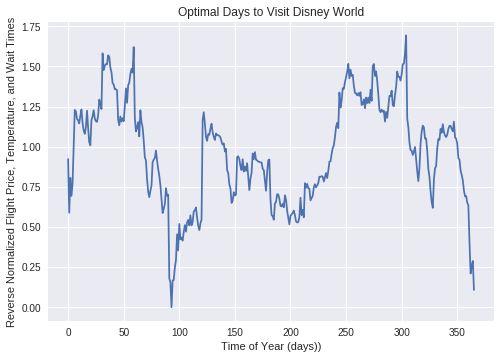

In [0]:
plotable6 = plotable4.reset_index()

#plt.xticks(np.arange(0,40),plotable6["index"])

plt.plot(plotable6["index"],plotable6["SumR"])

plt.title('Optimal Days to Visit Disney World')
plt.xlabel('Time of Year (days))')
plt.ylabel('Reverse Normalized Flight Price, Temperature, and Wait Times')

f.tight_layout()

#show the plot
plt.show()